In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 6]
from IPython.display import Audio

In [2]:
import numpy as np
import torch
from scipy.signal import find_peaks
from librosa.display import waveshow
import librosa

In [3]:
from rt_ddsp.synths import FilteredNoise
from rt_ddsp import core

## TODO
`sample_rate` never seems to come into play. SO, filter band frequeencies do not correspond to an equal division of the sample rate. The depend on the duration of the signal. Does not make any sense for now.

In [4]:
n_samples = 32000
sample_rate = 16000
n_bands = 100

In [5]:
noise = FilteredNoise(n_samples, sample_rate)

In [6]:
filter_bank_magnitudes = torch.rand(3, 500, n_bands) * 7.0
# filter_bank_magnitudes = torch.zeros(3, 500, n_bands)
# filter_bank_magnitudes[:, :, 2] = 10.0
# filter_bank_magnitudes[:, :, 25] = 10.0
# filter_bank_magnitudes[:, :, 26] = 10.0
# filter_bank_magnitudes[:, :, 50] = 5.0
# filter_bank_magnitudes[:, :, 70] = 9.0
signal = noise(filter_bank_magnitudes)
np_signal = signal[0].numpy()
np_fft = np.stack([np.abs(np.fft.rfft(s.numpy())) for s in signal])
stft = np.abs(librosa.stft(np_signal))

In [7]:
Audio(np_signal, rate=sample_rate, normalize=True)

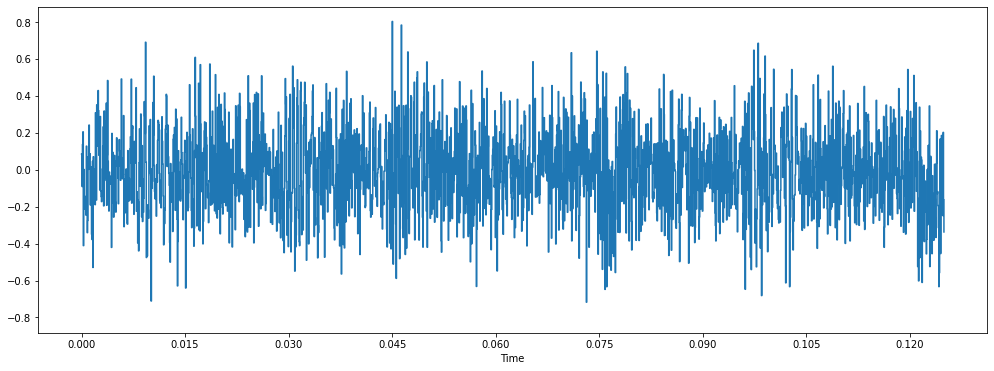

In [8]:
waveshow(np_signal[:2000], sr=sample_rate)
plt.show()

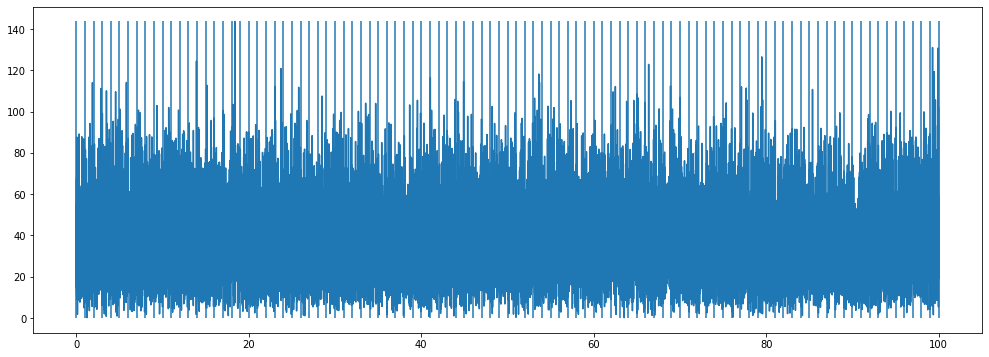

In [9]:
plt.plot(np.linspace(0, n_bands, len(np_fft[0])), np_fft[0])
plt.vlines(x=[i * (n_bands / n_bands) for i in range(n_bands + 1)], ymin=0, ymax=np_fft[0].max())
plt.show()

## Notes

~We have got the energy bands. Scaling is a bit weird. I guess thats because I don't know how filters work. To be continued...~

It was due to scaling inside the `FilteredNoise` class.

In [10]:
magnitudes = noise.get_controls(filter_bank_magnitudes)['magnitudes'].mean(0).mean(0).numpy()
bands = np.stack([np.array([np.sum(j[i * (len(j) // n_bands):(i + 1) * (len(j) // n_bands)]) for i in range(n_bands)]) for j in np_fft])
bands = np.mean(bands, axis=0)

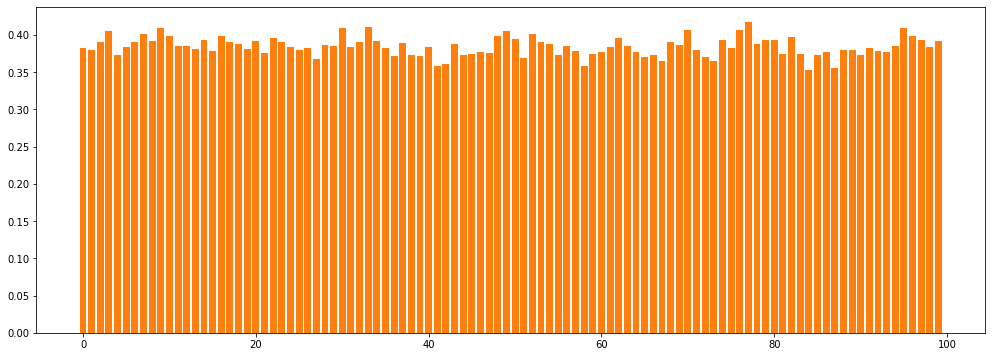

In [11]:
plt.bar(range(n_bands), magnitudes)
plt.bar(range(n_bands), bands / sample_rate)
plt.show()

In [12]:
(magnitudes @ bands) / (np.linalg.norm(magnitudes) * np.linalg.norm(bands))

0.9993271654447123